Introduction
--------------
Electrocardiography is the measurement of electrical activities in the heart which can be seen as a trace on a screen through the use of an electrocardiogram in determining state of health of a patient by observing waveform peaks or monitoring heart rythm to  reach an informed clinical conclusion.  An ECG is generated by a nerve impulse stimulus to the heart; with each beat this nerve impulse or wave travels through the heart which causes the muscle to squeeze and pump blood to the heart.
An ECG gives two major kinds of information. First, by measuring time intervals on the ECG, a doctor can determine how long the electrical wave takes to pass through the heart. Finding out how long a wave takes to travel from one part of the heart to the next shows if the electrical activity is normal or slow, fast or irregular
The Electrocardiogram (ECG) is a diagnostic tool that gives graphical measurements and recordings on the electrical activity of the heart over time. It is commonly used for diagnosing diseases by deducing the ECG signal. 

A normal heart beat / ECG signal is a combination of sinusoidal and triangular waveforms (P wave, QRS complex and T wave)  and these waveforms can be separated into; the isoelectric line (horizontal line with no electric activity), segments (the duration of isoelectric line between waves), and intervals (the time between the same segments of adjacent waves). 

The P wave represents the electrical activity of the atria ("atrial depolarization"), which are the two small chambers located at the top of the heart. The QRS complex which is the tallest most visible aspect of the trace represents ventricular depolarization i.e electrical activity of ventricles which are the two large chambers located at the bottom of the heart that forcefully pump blood throughout the body and theST segment which is a flat segment following the QRS complex that it provides important information to physicians about things such as potential heart attacks.
Lastly, the T wave shows the lower hear chamber resetting and preparing for the next muscle contraction.

The next section shows an ECG waveform from a file provided, and using python and we analyse the trace in other sections of this notebook by obtainingnthe heart rate and discrete fourier Transfrom, DFT of the acquired ECG signal





QUESTION 4


 The length of the file is: 43081


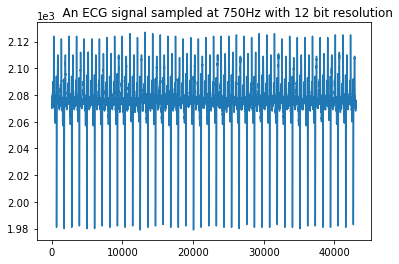

In [167]:


%matplotlib inline

import scipy as Sci
import scipy.linalg
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
f = open('aami3a.dat','rb')
AllSignal = np.fromfile(f,count=-1,dtype=np.uint16)
print('\n The length of the file is: ' + str(len(AllSignal)))
plt.plot(AllSignal[:43081])
plt.title('            An ECG signal sampled at 750Hz with 12 bit resolution')# Parameters as provided
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
f.close()

QUESTION 5


Determining number of samples individual at rest with an average heart rate between 60 and 100 bpm to obtain 5 beats



                                                                                      Rate(bpm) = 60/(R-R interval)
                                                                                      
    Where  R-R interval is the time between beats (0.6 to 1 sec in this instance)                                                                                 
    Assuming a heart rate of 80bpm (average of 60 and 100bpm) gives 1.33 beat per second
    For 5 beats 1.33.*5 = 6.67sec (approximation)
    sampling time = 1/750HZ
    
    Number of samples (Ns) = Total no of beats per sec/ sampling time
    Ns = 1.33/1.33e-3
    Ns= 5000

QUESTION 6

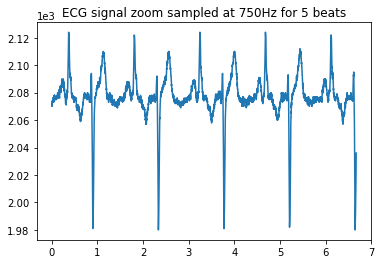

In [168]:
x=np.arange(0,5000/75e1,1/75e1)  

plt.plot(x,AllSignal[:5000])
plt.title('ECG signal zoom sampled at 750Hz for 5 beats')

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))


QUESTION 7

Comparing the values of the beats per second for 5 beats, obtained above, the heart rate is observed to be lower for this individual

QUESTION 8

In [163]:
p=np.amax(AllSignal[:5000])
print ('Peak value'+str(p))



Peak value2124


In [145]:
a=np.arange (21541)
C=0
for index in a:
                      if AllSignal [index]>=2124 :
                              C=C+1
                   print ('Heart rate of this individual in bpm is'  +str(C*2))


IndentationError: unindent does not match any outer indentation level (<ipython-input-145-8860ea365ab2>, line 6)

QUESTION 9

We now obtain the DFT of our ECG signal

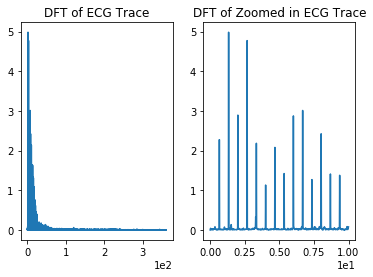

In [174]:


Trace=AllSignal[:43081]

dataF=Trace-np.mean(Trace) #eliminating dc components
L=len(dataF)
f=np.arange(0,72e1/2,72e1/43081)
Y=np.fft.fft(dataF)
PyyClean=abs(Y)/L


plt.subplot(121)
plt.plot(f, PyyClean[:21541])
plt.title('DFT of ECG Trace')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

inx=np.where(f>1e1)
inx=inx[0]
plt.subplot(122)
plt.plot(f[:inx[0]], PyyClean[:inx[0]])
plt.title('DFT of Zoomed in ECG Trace')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

In [177]:
x=np.amax(PyyClean)

print "maximum peak observed at  " + str(x)
 
       


maximum peak observed at  4.98176674504


QUESTION 14

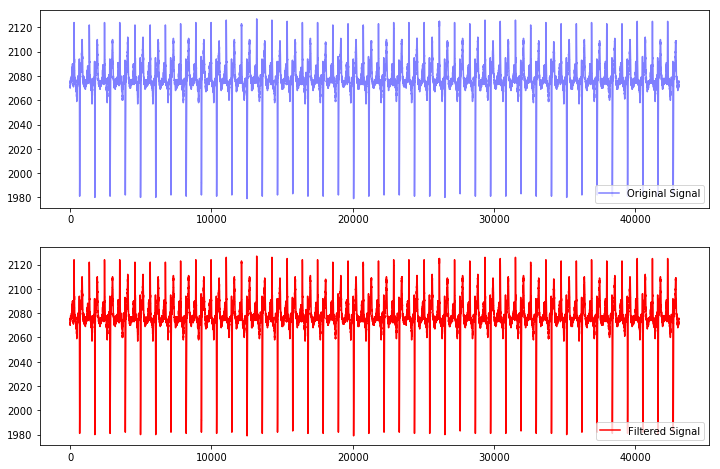

In [195]:
from scipy.signal import butter, lfilter #Import the extra module required

#Define the filter
def butter_lowpass(cutoff, fs, order=4):
    nyq = 0.5 * fs #Nyquist frequeny is half the sampling frequency
    normal_cutoff = cutoff / nyq 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a
    
def butter_lowpass_filter(data, cutoff, fs, order):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y


filtered = butter_lowpass_filter(Trace, 10e1, 200.0, 4)#cutoff, sampling frequency and order

#Plot it
plt.figure (figsize=(12,8))
plt.subplot(211)
plt.plot(Trace, color='Blue', alpha=0.5, label='Original Signal')
plt.legend(loc=4)
plt.subplot(212)
plt.plot(filtered, color='Red', label='Filtered Signal')

plt.legend(loc=4)
plt.show()


QUESTION 15

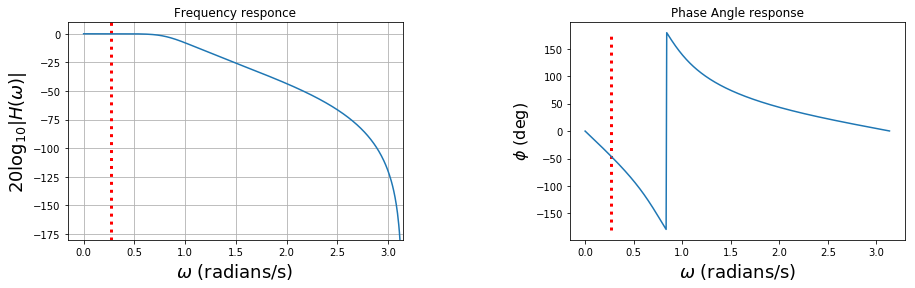

In [193]:
 from scipy import signal
import numpy as np
from __future__ import division
from matplotlib import gridspec
fig=plt.figure()
fig.set_size_inches((15,10))

gs = gridspec.GridSpec(2,2)
gs.update( wspace=0.5, hspace=0.5)

fs=750
NF=fs/2
cutoff= 100
Wn=100/NF
b,a=signal.butter(4,Wn,btype='low',analog= False)
w,h=signal.freqz(b,a)
s=signal.lfilter(b,a,dataF)
x=np.arange(0,43081/750.,1/750.)
ax = fig.add_subplot(plt.subplot(gs[0,0]))
ax.set_title('Frequency responce')
ax.plot(w, 20 * np.log10(abs(h)))
ax.set_ylabel(r"$ 20 \log_{10}|H(\omega)| $",fontsize=18)
ax.set_xlabel(r'$\omega$ (radians/s)',fontsize=18)
ax.set_xlim(xmax = np.pi)
ax.set_ylim(ymin=-180,ymax=10)
ax.vlines(Wn,-180,180,linestyles=':',color='r',lw=3.)
ax.grid()

ax = fig.add_subplot(plt.subplot(gs[0,1]))
plt.plot(w,np.angle(h)/np.pi*180)
ax.set_title('Phase Angle response')
ax.set_xlabel(r'$\omega$ (radians/s)',fontsize=18)
ax.set_ylabel(r"$\phi $ (deg)",fontsize=16)
ax.vlines(Wn,-180,180,linestyles=':',color='r',lw=3.)

References
---------------

* Sörnmo, Leif, and Pablo Laguna. "Electrocardiogram (ECG) signal processing." Wiley encyclopedia of biomedical engineering (2006)